<a href="https://colab.research.google.com/github/xiangyuan-zhang/controlgym/blob/main/controlgym_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import controlgym
import controlgym as gym

### Example 1: Applying a zero controller to the allen_cahn environment

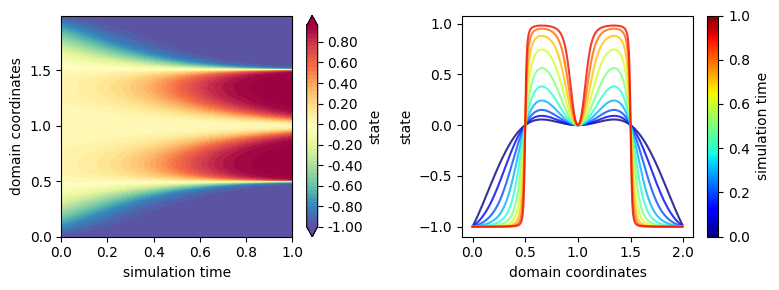

In [2]:
allen_cahn_env = gym.make("allen_cahn")
zero_controller = gym.controllers.Zero(allen_cahn_env)
zero_controller.run()
gym.save(zero_controller, temp_save=False, display=True, contour=True, surface3d=False, dpi=300);

### Example 2: Applying the LQG controller to the he1 environment

LQG controller reward: -0.4031752388917804


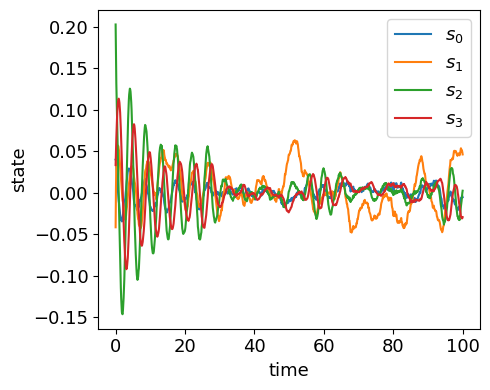

In [3]:
he1_env = gym.make("he1")
lqg_controller1 = gym.controllers.LQG(he1_env)
print(f"LQG controller reward: {lqg_controller1.run(seed=he1_env.seed)}")
gym.save(lqg_controller1, temp_save=False, display=True, dpi=300);

### Example 3: Applying the PPO controller to the he1 environment

In [4]:
# Import pytorch and check if GPU is available
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
# Train PPO controller
he1_env = gym.make("he1")
ppo_controller1 = gym.controllers.PPO(he1_env, actor_hidden_dim=64, critic_hidden_dim=64, lr=1e-5, discount_factor=0.99, device=device)
print(f"PPO reward before training: {ppo_controller1.run(seed=he1_env.seed)}")
ppo_controller1.train(num_train_iter=100, num_episodes_per_iter=64, episode_length=100, sgd_epoch_num=4, mini_batch_size=5, cov_param=0.05)
print(f"PPO reward after training: {ppo_controller1.run(seed=he1_env.seed)}")

PPO reward before training: -9.291642236935141e+23
Iteration:  0 , Average Rewards:  -11866.54829376641
Iteration:  1 , Average Rewards:  -5319.615578202427
Iteration:  2 , Average Rewards:  -5392.819804674967
Iteration:  3 , Average Rewards:  -5418.648111492772
Iteration:  4 , Average Rewards:  -7275.099978006488
Iteration:  5 , Average Rewards:  -3322.5182840590032
Iteration:  6 , Average Rewards:  -4431.823015699209
Iteration:  7 , Average Rewards:  -3152.6266589365405
Iteration:  8 , Average Rewards:  -3061.7924619214245
Iteration:  9 , Average Rewards:  -2107.972099578262
Iteration:  10 , Average Rewards:  -3026.800449292286
Iteration:  11 , Average Rewards:  -2526.6402431906963
Iteration:  12 , Average Rewards:  -2708.6132924936464
Iteration:  13 , Average Rewards:  -1946.8132107665863
Iteration:  14 , Average Rewards:  -1542.645329221942
Iteration:  15 , Average Rewards:  -1929.679268948342
Iteration:  16 , Average Rewards:  -1370.633235918903
Iteration:  17 , Average Rewards:  

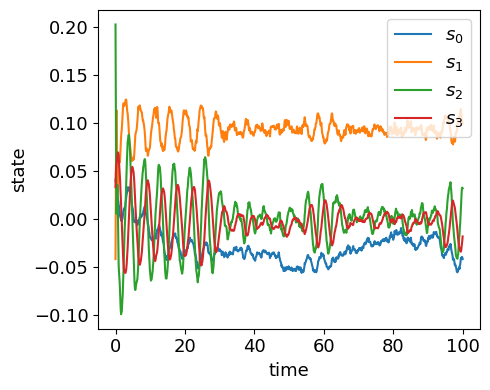

In [6]:
# Display the state trajectory controlled by the convergent PPO controller
# Due to the stochastic nature of the algorithm, the plot might not look the same as the one in the paper
gym.save(ppo_controller1, temp_save=False, display=True, dpi=300);

### Example 4: Applying the LQG controller to the wave environment

LQG controller reward: -2398.1344969800653


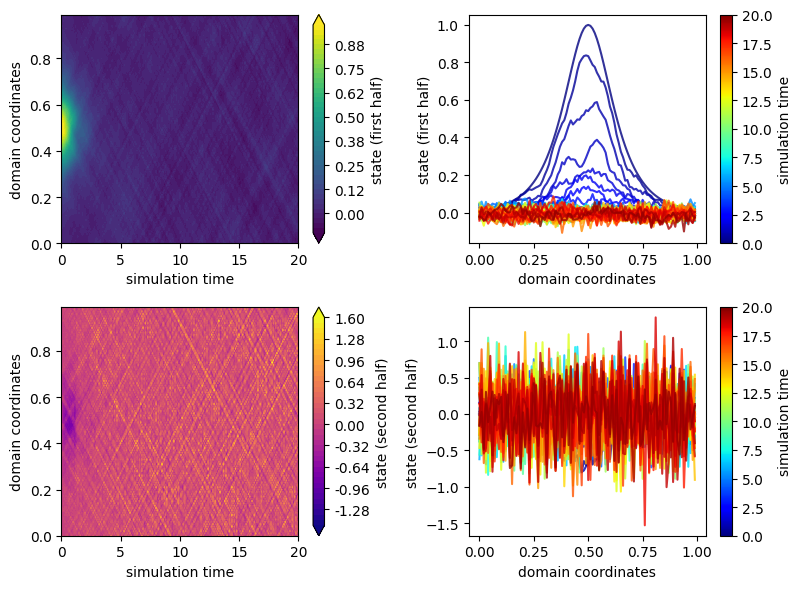

In [7]:
wave_env = gym.make("wave", process_noise_cov=1e-5, sensor_noise_cov=0.05)
lqg_controller2 = gym.controllers.LQG(wave_env)
print(f"LQG controller reward: {lqg_controller2.run(seed=wave_env.seed)}")
gym.save(lqg_controller2, temp_save=False, display=True, contour=True, surface3d=False, dpi=300);

### Example 5: Applying the PPO controller to the wave environment

In [8]:
# Train the PPO controller
wave_env = gym.make("wave", n_state=100, process_noise_cov=1e-5, sensor_noise_cov=0.05)
ppo_controller2 = gym.controllers.PPO(wave_env, actor_hidden_dim = 64, critic_hidden_dim = 64, lr = 1e-5, discount_factor=0.99, device=device)
print(f"Reward before training: {ppo_controller2.run(seed=wave_env.seed)}")
ppo_controller2.train(num_train_iter=50, num_episodes_per_iter=32, episode_length=100, sgd_epoch_num=4, mini_batch_size=5, cov_param=0.05)
print(f"Reward after training: {ppo_controller2.run(seed=wave_env.seed)}")

Reward before training: -1296096.0097751895
Iteration:  0 , Average Rewards:  -108759.00604147384
Iteration:  1 , Average Rewards:  -122730.03299151236
Iteration:  2 , Average Rewards:  -105374.45800427443
Iteration:  3 , Average Rewards:  -123332.30924371084
Iteration:  4 , Average Rewards:  -172422.6235575304
Iteration:  5 , Average Rewards:  -128171.3204839247
Iteration:  6 , Average Rewards:  -94829.39808469592
Iteration:  7 , Average Rewards:  -78846.89039417802
Iteration:  8 , Average Rewards:  -104652.06882911635
Iteration:  9 , Average Rewards:  -95084.3286884208
Iteration:  10 , Average Rewards:  -92307.8717461295
Iteration:  11 , Average Rewards:  -72846.06786353173
Iteration:  12 , Average Rewards:  -76070.37857895737
Iteration:  13 , Average Rewards:  -112788.99022495169
Iteration:  14 , Average Rewards:  -76136.57576075292
Iteration:  15 , Average Rewards:  -55158.52066387834
Iteration:  16 , Average Rewards:  -43280.73912732896
Iteration:  17 , Average Rewards:  -67344.98

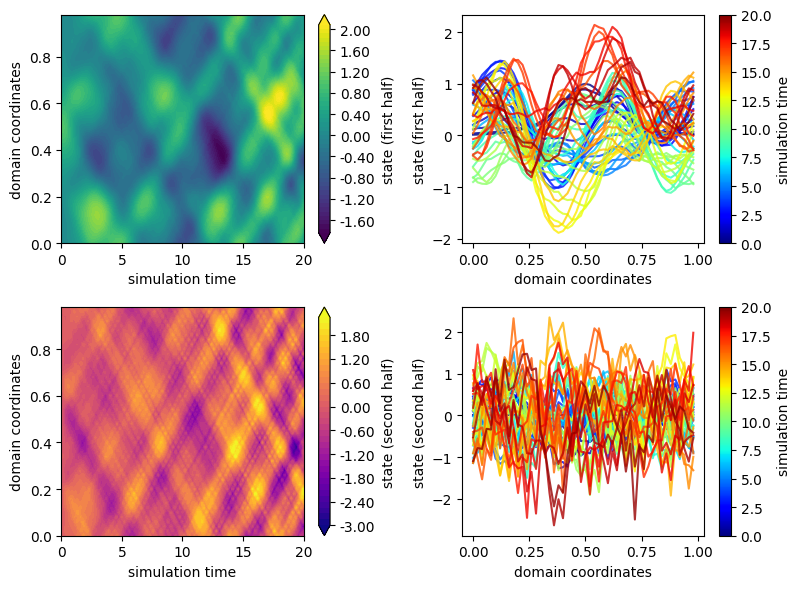

In [9]:
# Plot the state trajectory controlled by the convergent PPO controller
# Due to the stochastic nature of the algorithm, the plot might not look the same as the one in the paper
gym.save(ppo_controller2, temp_save=False, display=True, dpi=300);

### Example 6: Applying RL algorithms from stable-baseline3

In [10]:
# Required stable-baselines3 to be installed (pip3 install stable-baselines3)
# import stable_baselines3
import numpy as np
from stable_baselines3 import SAC

In [11]:
def rollout_reward(env, model):
    reward_sum = 0.0
    obs, info = env.reset()
    state_traj = np.zeros((env.n_state, env.n_steps + 1))
    state_traj[:, 0] = info["state"]
    for t in range(env.n_steps):
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, _, _, info = env.step(action)
        state_traj[:, t + 1] = info["state"]
        reward_sum += reward
    env.state_traj = state_traj
    return reward_sum

toy_env = gym.make("toy", n_steps=100, action_limit=10, observation_limit=10)            
sac_controller = SAC("MlpPolicy", toy_env, verbose=1, batch_size=64, learning_rate=1e-5, policy_kwargs={'log_std_init': -3.0})
print(f'SAC reward before training: {rollout_reward(toy_env, sac_controller)}')
sac_controller.learn(total_timesteps=10000)
print(f'SAC reward after training: {rollout_reward(toy_env, sac_controller)}')

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
SAC reward before training: -391.78103332664165
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 100       |
|    ep_rew_mean     | -4.48e+03 |
| time/              |           |
|    episodes        | 4         |
|    fps             | 267       |
|    time_elapsed    | 1         |
|    total_timesteps | 400       |
| train/             |           |
|    actor_loss      | 1.02      |
|    critic_loss     | 3.55e+03  |
|    ent_coef        | 0.997     |
|    ent_coef_loss   | -0.005    |
|    learning_rate   | 1e-05     |
|    n_updates       | 299       |
----------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 100       |
|    ep_rew_mean     | -4.25e+03 |
| time/              |           |
|    episodes        | 8         |
|    fps             | 237       |
|    time_elapsed 

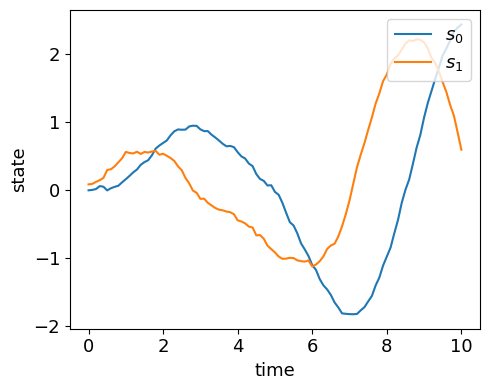

In [12]:
# plot the state trajectory controlled by the convergent SAC controller
sac_controller.env = toy_env
gym.save(sac_controller, temp_save=False, display=True, dpi=300);